In [ ]:
from google.colab import drive                  
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [ ]:
IMAGE_SIZE = [150, 150] 

epochs = 10
batch_size = 100

In [ ]:
train_path = '/content/drive/My Drive/Output train_Uni'
test_path = '/content/drive/My Drive/Output test_Uni'

In [ ]:
image_files_train = glob(train_path + '/*/*.jp*g')
image_files_test = glob(test_path + '/*/*.jp*g')


folders = glob(train_path + '/*')

print(len(image_files_train))
print(len(image_files_test))

3102
1308


In [ ]:
vgg=VGG16(include_top=False,weights='imagenet',input_shape=(150,150,3))

In [ ]:
for layer in vgg.layers:
    layer.trainable =False
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [ ]:
import keras
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3), loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
gen=ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,preprocessing_function=preprocess_input)

In [ ]:
test_gen=gen.flow_from_directory(test_path,target_size=IMAGE_SIZE)

Found 1309 images belonging to 15 classes.


In [ ]:
labels = [None] * len(test_gen.class_indices)
print(labels)
for k, v in test_gen.class_indices.items():
  labels[v] = k
print(labels[0])

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Captain Falcon


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -123.68 max: 151.061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


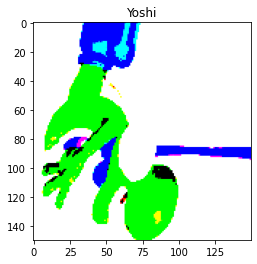

In [ ]:
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  print(y[0])
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [ ]:
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  test_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 3142 images belonging to 15 classes.
Found 1309 images belonging to 15 classes.


In [ ]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files_train) // batch_size,
  validation_steps=len(image_files_test) // batch_size,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 3/31 [=>............................] - ETA: 5:46 - loss: 24.6468 - accuracy: 0.1167

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/31 [==============================] - 1730s 56s/step - loss: 10.5467 - accuracy: 0.4974 - val_loss: 7.4881 - val_accuracy: 0.6477
Epoch 2/10
31/31 [==============================] - 139s 4s/step - loss: 4.5135 - accuracy: 0.7344 - val_loss: 6.5697 - val_accuracy: 0.6954
Epoch 3/10
31/31 [==============================] - 120s 4s/step - loss: 3.0793 - accuracy: 0.7998 - val_loss: 6.9599 - val_accuracy: 0.6962
Epoch 4/10
31/31 [==============================] - 122s 4s/step - loss: 2.9725 - accuracy: 0.8123 - val_loss: 6.4167 - val_accuracy: 0.7146
Epoch 5/10
31/31 [==============================] - 121s 4s/step - loss: 2.4166 - accuracy: 0.8445 - val_loss: 6.2236 - val_accuracy: 0.7438
Epoch 6/10
31/31 [==============================] - 116s 4s/step - loss: 2.2066 - accuracy: 0.8606 - val_loss: 6.5404 - val_accuracy: 0.7508
Epoch 7/10
31/31 [==============================] - 121s 4s/step - loss: 1.8972 - accuracy: 0.8748 - val_loss: 6.1842 - val_accuracy: 0.7477
Epoch 8/10
31/31 [===

In [ ]:
STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size
valid_generator.reset()
pred=model.predict_generator(valid_generator,
steps=STEP_SIZE_TEST,
verbose=1)
predicted_class_indices_test=np.argmax(pred,axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/13 [==============================] - 39s 3s/step


In [ ]:
STEP_SIZE_Train=train_generator.n//train_generator.batch_size
train_generator.reset()
pred2=model.predict_generator(train_generator,
steps=STEP_SIZE_Train,
verbose=1)
predicted_class_indices_train=np.argmax(pred2,axis=1)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/31 [==============================] - 79s 3s/step


In [ ]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [ ]:
print(train_generator.class_indices) # pour le train
print(valid_generator.class_indices) # pour le test

{'Captain Falcon': 0, 'Daisy': 1, 'Donkey Kong': 2, 'Fox': 3, 'Harmonie': 4, 'Link': 5, 'Luigi': 6, 'Mario': 7, 'Phoenix Wright': 8, 'Pikachu': 9, 'Professor Layton': 10, 'Tiny Kong': 11, 'Toad': 12, 'Waluigi': 13, 'Yoshi': 14}
{'Captain Falcon': 0, 'Daisy': 1, 'Donkey Kong': 2, 'Fox': 3, 'Harmonie': 4, 'Link': 5, 'Luigi': 6, 'Mario': 7, 'Phoenix Wright': 8, 'Pikachu': 9, 'Professor Layton': 10, 'Tiny Kong': 11, 'Toad': 12, 'Waluigi': 13, 'Yoshi': 14}


Chaque numéro correspond à une classe, parmi les 15. On a le même résultat pour le train et le test.

Generating confusion matrix 3102
Found 3142 images belonging to 15 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Matrice de confusion pour le train


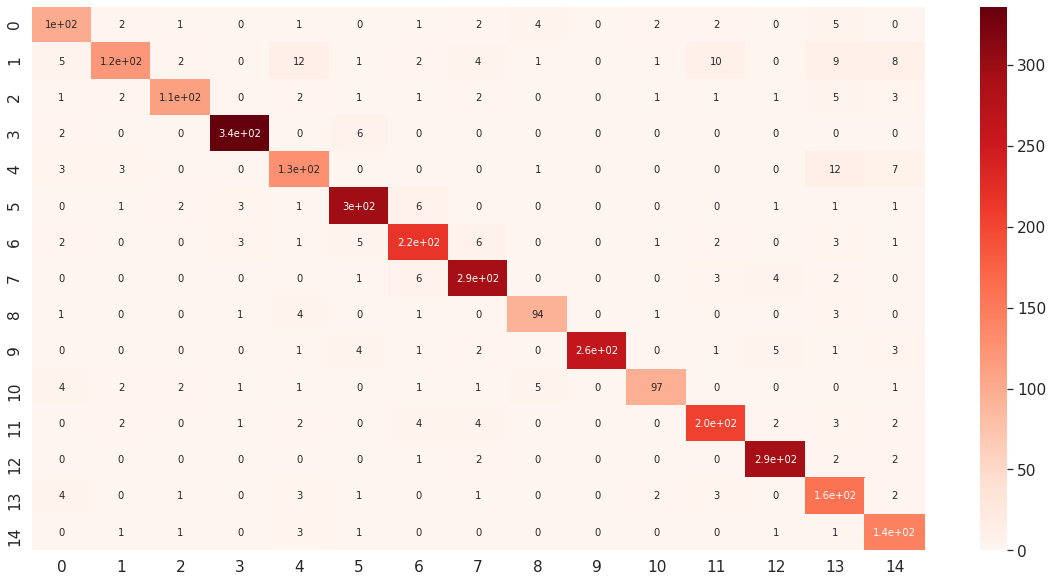

In [ ]:
import seaborn as sns
import numpy as np
train_cm = get_confusion_matrix(train_path, len(image_files_train))
#print(train_cm)
print('Matrice de confusion pour le train')
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)
sns.heatmap(train_cm, annot=True, annot_kws={"size": 10}, cmap='Reds')

Generating confusion matrix 1308
Found 1309 images belonging to 15 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Matrice de confusion pour le test


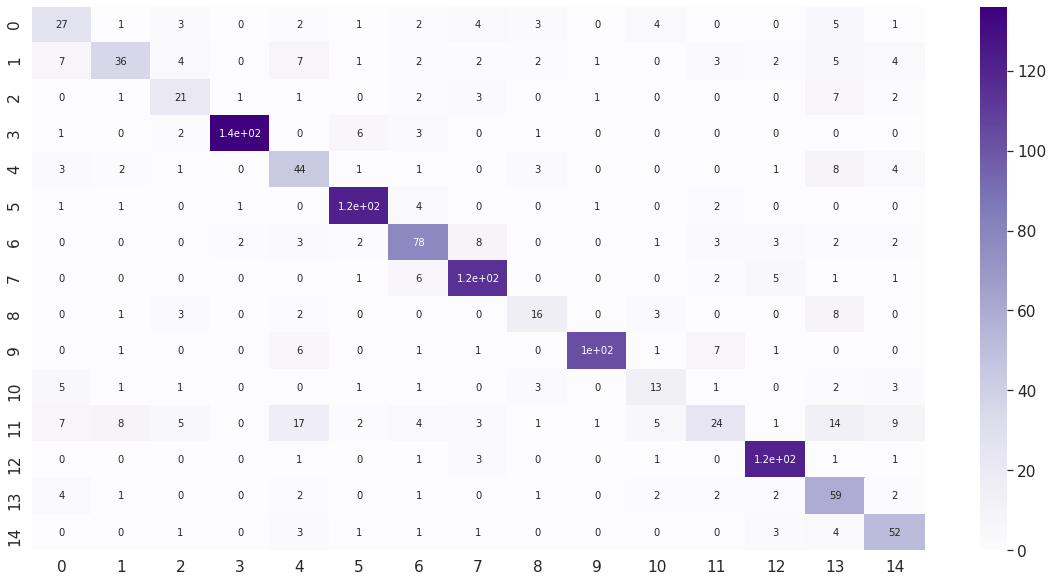

In [ ]:
test_cm = get_confusion_matrix(test_path, len(image_files_test))
#print(test_cm)
print('Matrice de confusion pour le test')
plt.figure(figsize = (20,10))
sns.set(font_scale=1.4)
sns.heatmap(test_cm, annot=True, annot_kws={"size": 10}, cmap='Purples')

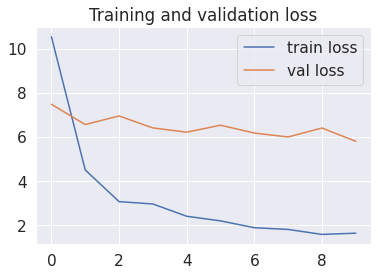

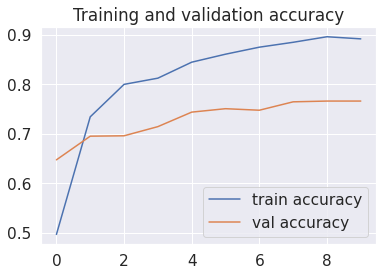

In [ ]:
#print(r.history)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

D'après les graphiques si-dessus, pour la valeur loss on remarque que la courde chez le test possède de meilleures valeurs que le train. Cependant pour l'accuracy, on observe l'inverse.

In [ ]:
score_train = model.evaluate_generator(train_generator, len(image_files_train) // batch_size)
print(f'Train results - Loss: {score_train[0]} - Accuracy: {score_train[1]}')
score_test = model.evaluate_generator(valid_generator, len(image_files_test) // batch_size)
print(f'Test results - Loss: {score_test[0]} - Accuracy: {score_test[1]}')

Instructions for updating:
Please use Model.evaluate, which supports generators.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train results - Loss: 1.3297816514968872 - Accuracy: 0.9051612615585327
Test results - Loss: 6.408075332641602 - Accuracy: 0.7546153664588928


D'après les résultats ci-dessus, on remarque qu'il y a un sur-apprentissage, entre les données de l'échantillon "train", et celles de l'échantillon "test". Cela signifie que le modèle se consacre plus au train qu'au test. 
Un moyen de résoudre le problème est de faire une cross-validation.

In [31]:
model.save('Model_VGG16_Projet_final.nh5') #pour sauvegarder le modèle pour l'application 

INFO:tensorflow:Assets written to: Model_VGG16_Projet_final.nh5/assets
